<a href="https://colab.research.google.com/github/jiin124/Dacon/blob/main/%EA%B0%80%EC%8A%A4%EA%B3%B5%EA%B8%89%EB%9F%89/%EA%B0%80%EC%8A%A4_%EA%B3%B5%EA%B8%89%EB%9F%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/한국가스공사_시간별 공급량_20181231 (1).csv', encoding='utf-8')
df.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연월일     368088 non-null  object 
 1   시간      368088 non-null  int64  
 2   구분      368088 non-null  object 
 3   공급량     368088 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.2+ MB


In [ ]:
df

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


In [ ]:
df['연월일']=pd.to_datetime(df['연월일'])

In [ ]:
import datetime

df['year']=df['연월일'].dt.year
df['month']=df['연월일'].dt.month
df['day']=df['연월일'].dt.day
df['weekday']=df['연월일'].dt.weekday

In [ ]:
df.head()

,연월일,시간,구분,공급량,year,month,day,weekday
0,2013-01-01,1,A,2497.129,2013,1,1,1
1,2013-01-01,2,A,2363.265,2013,1,1,1
2,2013-01-01,3,A,2258.505,2013,1,1,1
3,2013-01-01,4,A,2243.969,2013,1,1,1
4,2013-01-01,5,A,2344.105,2013,1,1,1


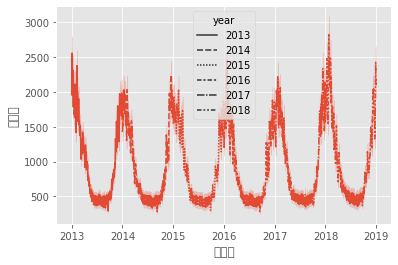

In [ ]:
sns.lineplot(data=df,
             x='연월일',
             y='공급량',
             style='year')

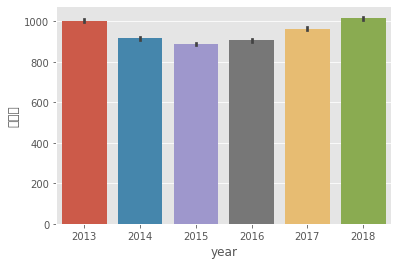

In [ ]:
sns.barplot(data=df,x='year',y='공급량')

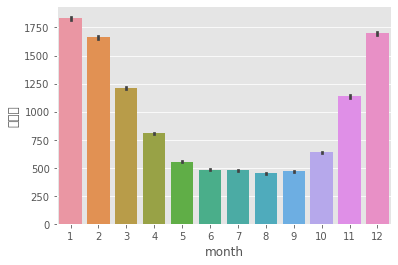

In [ ]:
sns.barplot(data=df,x='month',y='공급량')

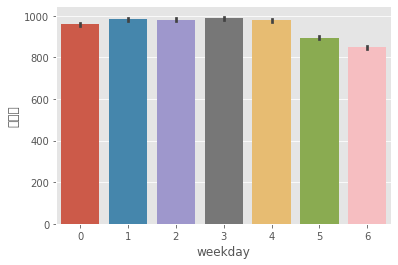

In [ ]:
sns.barplot(data=df,x='weekday',y='공급량')

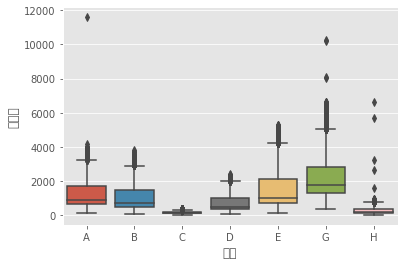

In [ ]:
sns.boxplot(data=df,x='구분',y='공급량')

In [ ]:
df_one=pd.get_dummies(df['구분'])
df.drop('구분',axis=1,inplace=True)
df=pd.concat([df,df_one],axis=1)
df

,연월일,시간,공급량,year,month,day,weekday,A,B,C,D,E,G,H
0,2013-01-01,1,2497.129,2013,1,1,1,1,0,0,0,0,0,0
1,2013-01-01,2,2363.265,2013,1,1,1,1,0,0,0,0,0,0
2,2013-01-01,3,2258.505,2013,1,1,1,1,0,0,0,0,0,0
3,2013-01-01,4,2243.969,2013,1,1,1,1,0,0,0,0,0,0
4,2013-01-01,5,2344.105,2013,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,681.033,2018,12,31,0,0,0,0,0,0,0,1
368084,2018-12-31,21,669.961,2018,12,31,0,0,0,0,0,0,0,1
368085,2018-12-31,22,657.941,2018,12,31,0,0,0,0,0,0,0,1
368086,2018-12-31,23,610.953,2018,12,31,0,0,0,0,0,0,0,1


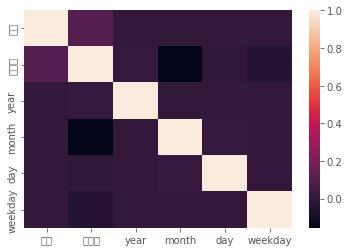

In [ ]:
sns.heatmap(df.corr())

In [ ]:
train_years = [2013,2014,2015,2016,2017]
val_years = [2018]

In [ ]:
train = df[df['year'].isin(train_years)]
val = df[df['year'].isin(val_years)]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306768 entries, 0 to 306767
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   연월일      306768 non-null  datetime64[ns]
 1   시간       306768 non-null  int64         
 2   공급량      306768 non-null  float64       
 3   year     306768 non-null  int64         
 4   month    306768 non-null  int64         
 5   day      306768 non-null  int64         
 6   weekday  306768 non-null  int64         
 7   A        306768 non-null  uint8         
 8   B        306768 non-null  uint8         
 9   C        306768 non-null  uint8         
 10  D        306768 non-null  uint8         
 11  E        306768 non-null  uint8         
 12  G        306768 non-null  uint8         
 13  H        306768 non-null  uint8         
dtypes: datetime64[ns](1), float64(1), int64(5), uint8(7)
memory usage: 20.8 MB


In [ ]:
val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61320 entries, 306768 to 368087
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   연월일      61320 non-null  datetime64[ns]
 1   시간       61320 non-null  int64         
 2   공급량      61320 non-null  float64       
 3   year     61320 non-null  int64         
 4   month    61320 non-null  int64         
 5   day      61320 non-null  int64         
 6   weekday  61320 non-null  int64         
 7   A        61320 non-null  uint8         
 8   B        61320 non-null  uint8         
 9   C        61320 non-null  uint8         
 10  D        61320 non-null  uint8         
 11  E        61320 non-null  uint8         
 12  G        61320 non-null  uint8         
 13  H        61320 non-null  uint8         
dtypes: datetime64[ns](1), float64(1), int64(5), uint8(7)
memory usage: 4.2 MB


In [ ]:
x_train=train.drop('공급량',axis=1)
y_train=train['공급량']
x_test=val.drop('공급량',axis=1)
y_test=val['공급량']

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(306768, 13)
(61320, 13)
(306768,)
(61320,)


In [ ]:
x_train.drop('연월일',axis=1,inplace=True)
x_test.drop('연월일',axis=1,inplace=True)

In [ ]:
x_train.head()

,시간,구분,year,month,day,weekday
0,1,A,2013,1,1,1
1,2,A,2013,1,1,1
2,3,A,2013,1,1,1
3,4,A,2013,1,1,1
4,5,A,2013,1,1,1


## pycaret

In [ ]:
import sys
!{sys.executable} -m pip install numpy

In [ ]:
df.drop('연월일',axis=1,inplace=True)

In [ ]:
df

,시간,공급량,year,month,day,weekday,A,B,C,D,E,G,H
0,1,2497.129,2013,1,1,1,1,0,0,0,0,0,0
1,2,2363.265,2013,1,1,1,1,0,0,0,0,0,0
2,3,2258.505,2013,1,1,1,1,0,0,0,0,0,0
3,4,2243.969,2013,1,1,1,1,0,0,0,0,0,0
4,5,2344.105,2013,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,20,681.033,2018,12,31,0,0,0,0,0,0,0,1
368084,21,669.961,2018,12,31,0,0,0,0,0,0,0,1
368085,22,657.941,2018,12,31,0,0,0,0,0,0,0,1
368086,23,610.953,2018,12,31,0,0,0,0,0,0,0,1


In [ ]:
pip install pycaret

     |████████████████████████████████| 301 kB 6.6 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
     |████████████████████████████████| 114 kB 16.6 MB/s 
     |████████████████████████████████| 167 kB 16.4 MB/s 
     |████████████████████████████████| 1.3 MB 17.0 MB/s 
     |████████████████████████████████| 261 kB 38.2 MB/s 
     |████████████████████████████████| 6.8 MB 29.4 MB/s 
     |████████████████████████████████| 15.6 MB 57.5 MB/s 
     |████████████████████████████████| 1.7 MB 51.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 53.7 MB/s 
     |████████████████████████████████| 56 kB 5.8 MB/s 
     |████████████████████████████████| 274 kB 77.7 MB/s 
     |████████████████████████████████| 102 kB 13.8 MB/s 
     |████████████████████████████████| 675 kB 45.4 MB/s 
     |█████████████████

In [ ]:
from pycaret.regression import *

In [ ]:
clf1 = setup(data = df,
             silent = True,
             target = '공급량',
             session_id = 20201809,
             n_jobs = 7)

,Description,Value
0,session_id,20201809
1,Target,공급량
2,Original Data,"(368088, 13)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(257661, 34)"


In [ ]:
best=compare_models(n_select=4,fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,74.3440,13741.7534,117.0664,0.9841,0.4097,0.4656,31.888
dt,Decision Tree Regressor,59.3060,15651.8148,124.8640,0.9818,0.1066,0.0675,1.593
lightgbm,Light Gradient Boosting Machine,99.2182,25352.4066,159.1496,0.9706,0.4325,0.5214,2.144
gbr,Gradient Boosting Regressor,198.0787,88108.8923,296.8001,0.8977,0.6147,0.7175,25.315
ridge,Ridge Regression,331.0279,191321.3125,437.3850,0.7780,0.8328,2.4330,0.129
lar,Least Angle Regression,331.0413,191319.7949,437.3832,0.7780,0.8329,2.4335,0.146
br,Bayesian Ridge,331.0280,191321.3145,437.3850,0.7780,0.8328,2.4330,0.631
lasso,Lasso Regression,329.0126,191577.9000,437.6778,0.7777,0.8180,2.3281,0.315
lr,Linear Regression,331.3953,191546.3750,437.6411,0.7777,0.8363,2.4438,1.511
huber,Huber Regressor,316.6150,202950.9225,450.4807,0.7645,0.7636,1.6059,8.972


In [ ]:
catboost=create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,74.8957,13323.4761,115.4274,0.9847,0.3883,0.4171
1,74.3800,13606.6799,116.6477,0.9842,0.4197,0.4684
2,74.2924,12768.6796,112.9986,0.9851,0.4026,0.4447
3,75.1349,16570.5778,128.7268,0.9809,0.4225,0.5267
4,73.6563,12493.9810,111.7765,0.9852,0.4297,0.5186
5,73.8505,12573.6027,112.1321,0.9855,0.3927,0.4159
6,74.1150,16569.2896,128.7218,0.9807,0.3908,0.4206
7,74.6088,13037.8159,114.1833,0.9852,0.4315,0.5443
8,74.1444,12676.4609,112.5898,0.9853,0.4170,0.4715
9,74.3624,13796.9706,117.4605,0.9837,0.4017,0.4280


In [ ]:
import numpy as np
cat = [create_model('catboost', learning_rate=i) for i in np.arange(0.1,1,0.1)]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,45.5726,4513.7158,67.1842,0.9948,0.3354,0.2499
1,45.1610,4737.7785,68.8315,0.9945,0.3346,0.2599
2,45.4089,4285.3714,65.4627,0.9950,0.3287,0.2542
3,46.0558,7264.7650,85.2336,0.9916,0.3429,0.2928
4,45.1307,4538.1158,67.3655,0.9946,0.3435,0.2716
5,45.3246,5485.9450,74.0672,0.9937,0.3212,0.2397
6,45.7534,8365.4823,91.4630,0.9903,0.3268,0.2465
7,45.4329,4230.1713,65.0398,0.9952,0.3527,0.2989
8,45.9570,4410.9328,66.4149,0.9949,0.3502,0.2897
9,45.7059,7791.8950,88.2717,0.9908,0.3346,0.2565


In [ ]:
print(len(cat))

In [ ]:
tuned_cat = tune_model(catboost, n_iter=50, optimize = 'MAE')

In [ ]:
tuned_cat

## catboost

In [ ]:
pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(
    n_estimators = 200,
    loss_function = 'MAE',
    eval_metric = 'RMSE',
    cat_features = cfi )

In [ ]:
from catboost import CatBoostRegressor

cat=CatBoostRegressor(
    loss_function='MAE',
    eval_metric='RMSE'
)
cat.fit(x_train,y_train,eval_set=(x_test,y_test),plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 936.5561594	test: 1058.0596794	best: 1058.0596794 (0)	total: 119ms	remaining: 1m 59s
1:	learn: 914.6349260	test: 1036.2967865	best: 1036.2967865 (1)	total: 206ms	remaining: 1m 42s
2:	learn: 894.7023665	test: 1016.6037728	best: 1016.6037728 (2)	total: 267ms	remaining: 1m 28s
3:	learn: 874.2473970	test: 996.2829016	best: 996.2829016 (3)	total: 350ms	remaining: 1m 27s
4:	learn: 854.5368506	test: 976.6910595	best: 976.6910595 (4)	total: 439ms	remaining: 1m 27s
5:	learn: 836.9347132	test: 959.3589143	best: 959.3589143 (5)	total: 489ms	remaining: 1m 20s
6:	learn: 818.9334166	test: 941.5316123	best: 941.5316123 (6)	total: 574ms	remaining: 1m 21s
7:	learn: 802.2849284	test: 925.1582985	best: 925.1582985 (7)	total: 668ms	remaining: 1m 22s
8:	learn: 786.8229844	test: 910.0873140	best: 910.0873140 (8)	total: 757ms	remaining: 1m 23s
9:	learn: 771.5388034	test: 895.0313584	best: 895.0313584 (9)	total: 842ms	remaining: 1m 23s
10:	learn: 756.9640553	test: 880.8287863	best: 880.8287863 (10)	

In [ ]:
from sklearn.metrics import mean_squared_error as mse

mse( cat.predict( x_test ), y_test )

77422.4938326366

In [ ]:
pred

array([1798.28889352, 1716.80422789, 1709.42173176, ...,  583.71667855,
        556.72520728,  546.68534062])

In [ ]:
y_test

306768    1765.008
306769    1679.186
306770    1610.885
306771    1604.123
306772    1711.506
            ...   
368083     681.033
368084     669.961
368085     657.941
368086     610.953
368087     560.896
Name: 공급량, Length: 61320, dtype: float64